In [5]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import h5py  
#import readers as rd
import os
import fiona
import geopandas
import time
from sklearn.neighbors import KernelDensity
import scipy
from astropy.time import Time
import geopandas as gpd

In [6]:
def Rescale(path, outdir):
    for file in os.listdir(path):
        if file.endswith('shp'):

            filename = file[3:7]
            points = os.path.join(path,file)
            pts = gpd.read_file(points)
            
            start = list(range(int(pts.AT_dist[0]), (len(pts)-50)))
            mid = list(range(int(pts.AT_dist[0]+25), (len(pts)-25)))
            stop = list(range((int(pts.AT_dist[0])+50), len(pts)))
            
            i = 0
            AT_dist_list =[]
            ESD_list = []
            geometry_list = []
            DEM_list = []
            ESD_std_list = []
            
            for i in range(len(start)):

                ATdist = (pts.AT_dist[start[i]:stop[i]]).median()
                ESD = (pts.SD[start[i]:stop[i]]).mean()
                geometry = (pts.geometry[mid[i]])
                dem = (pts.DEM[start[i]:stop[i]]).median()
                ESD_std = (pts.SD[start[i]:stop[i]]).std()

                AT_dist_list.append(ATdist)
                ESD_list.append(ESD)
                geometry_list.append(geometry)
                DEM_list.append(dem)
                ESD_std_list.append(ESD_std)
                
            gdf = gpd.GeoDataFrame(list(zip(AT_dist_list, ESD_list, geometry_list, ESD_std_list)),
                               columns =['AT_dist', 'ESD', 'geometry', 'ESD_std'])
                
            gdf = gdf[gdf['ESD_std'] < 4]
            gdf = gdf.set_crs('EPSG:25833')
                
            gdf.to_file(outdir+'SD_Rescaled2_'+filename+'.shp')
                
            print('processing completed for beam: ', filename, ' Plots below:')
                
            plt.plot(AT_dist_list, ESD_list, 'o', color='black');
            plt.plot(AT_dist_list, DEM_list, 'o', color='black');

In [7]:
path = 'C:/Users/Rasmu/Documents/Thesis/Snow_Depth_2/'
outdir = 'C:/Users/Rasmu/Documents/Thesis/SD_Rescaled/'

processing completed for beam:  gt1l  Plots below:
processing completed for beam:  gt1r  Plots below:
processing completed for beam:  gt2l  Plots below:
processing completed for beam:  gt2r  Plots below:
processing completed for beam:  gt3l  Plots below:
processing completed for beam:  gt3r  Plots below:


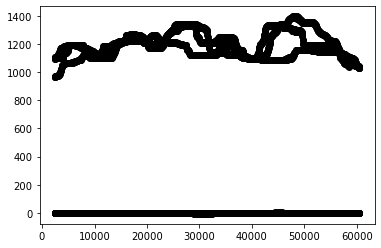

In [8]:
Rescale(path, outdir)